In [57]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


# ML ASSIGNMENT 2

In [354]:
#import the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm

In [355]:
#load the data
adata=pd.read_csv('AutoData.csv')

In [356]:
adata.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [357]:
adata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [358]:
adata.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [359]:
adata.describe(include='object')

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corolla,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [360]:
adata.shape

(205, 25)

In [361]:
adata.fueltype.value_counts(normalize=True)

gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64

In [362]:
adata.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### Below are the attributes of float type

In [363]:
adata.select_dtypes(include=[np.float64])

,wheelbase,carlength,carwidth,carheight,boreratio,stroke,compressionratio,price
0,88.6,168.8,64.1,48.8,3.47,2.68,9.0,13495.0
1,88.6,168.8,64.1,48.8,3.47,2.68,9.0,16500.0
2,94.5,171.2,65.5,52.4,2.68,3.47,9.0,16500.0
3,99.8,176.6,66.2,54.3,3.19,3.40,10.0,13950.0
4,99.4,176.6,66.4,54.3,3.19,3.40,8.0,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,3.78,3.15,9.5,16845.0
201,109.1,188.8,68.8,55.5,3.78,3.15,8.7,19045.0
202,109.1,188.8,68.9,55.5,3.58,2.87,8.8,21485.0
203,109.1,188.8,68.9,55.5,3.01,3.40,23.0,22470.0


#### These attributes are of int64 


In [364]:
adata.select_dtypes(include=[np.int64])

,symboling,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg
0,3,2548,130,111,5000,21,27
1,3,2548,130,111,5000,21,27
2,1,2823,152,154,5000,19,26
3,2,2337,109,102,5500,24,30
4,2,2824,136,115,5500,18,22
...,...,...,...,...,...,...,...
200,-1,2952,141,114,5400,23,28
201,-1,3049,141,160,5300,19,25
202,-1,3012,173,134,5500,18,23
203,-1,3217,145,106,4800,26,27


#### Categorical data

In [365]:
adata.select_dtypes(exclude=[np.number])

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [366]:
adata.groupby('fuelsystem').make.count().sort_values(ascending= False)


fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: make, dtype: int64

##### getting info about unique values in categorical type of data

In [367]:
uniq=['doornumber','aspiration','enginelocation','fueltype']
for i in uniq:
    print(str(i).upper())
    print(adata[i].unique())


DOORNUMBER
['two' 'four']
ASPIRATION
['std' 'turbo']
ENGINELOCATION
['front' 'rear']
FUELTYPE
['gas' 'diesel']


### Converting to these categorical variables to 0s and 1s

In [368]:

def _doornumber(x):
    return x.map({'two':0,'four':1})
adata[['doornumber']] = adata[['doornumber']].apply(_doornumber)


def _aspiration(x):
    return x.map({'std':0,'turbo':1})
adata[['aspiration']] =adata[['aspiration']].apply(_aspiration)


def _englocation(x):
    return x.map({'front':1,'rear':0})
adata[['enginelocation']] = adata[['enginelocation']].apply(_englocation)


def _fueltyp(x):
    return x.map({'gas':0,'diesel':1})
adata[['fueltype']] = adata[['fueltype']].apply(_fueltyp)

In [369]:
adata.describe(exclude=np.number)

,make,carbody,drivewheel,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205
unique,147,5,3,7,7,8
top,toyota corolla,sedan,fwd,ohc,four,mpfi
freq,6,96,120,148,159,94


In [370]:
adata.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,0,0,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,0,0,0,convertible,rwd,1,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,0,0,0,hatchback,rwd,1,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,0,0,1,sedan,fwd,1,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,0,0,1,sedan,4wd,1,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [371]:
adata[['brand','model']] = adata['make'].str.split(' ', n=1, expand=True)
adata.drop(['make'], axis = 1, inplace = True)

In [372]:
adata.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [373]:
#as we can see there are more number no. of duplicates , we need to correct them
adata[['brand']]=adata['brand'].str.replace('Nissan','nissan')
adata[['brand']]=adata['brand'].str.replace('maxda','mazda')
adata[['brand']]=adata['brand'].str.replace('porcshce','porsche')
adata[['brand']]=adata['brand'].str.replace('toyouta','toyota')
adata[['brand']]=adata['brand'].str.replace('vokswagen','volkswagen')
adata[['brand']]=adata['brand'].str.replace('vw','volkswagen')

# EXPLORATORY DATA ANALYSIS

In [374]:
import warnings
warnings.filterwarnings('ignore')

### from the plotted graph it is clear that fuel type of DIESEL impacts only idi fuel system.

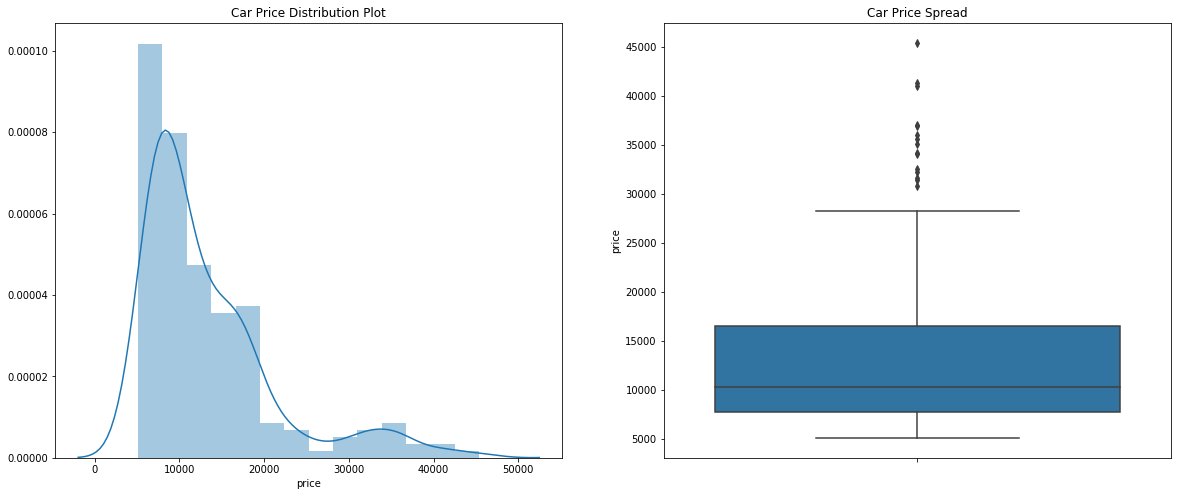

In [375]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(adata.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=adata.price)

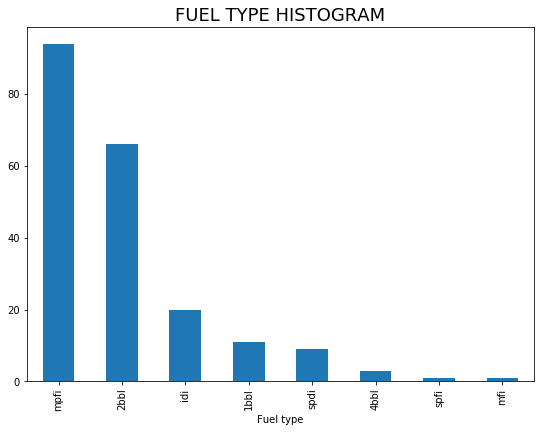

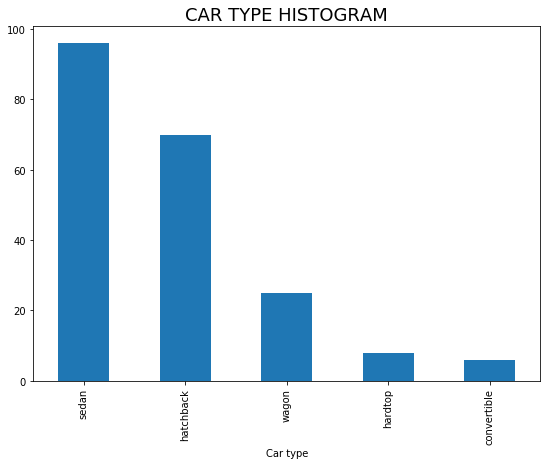

In [381]:
plt.figure(figsize=(20,30))


plt.subplot(4,2,1)
adata.fuelsystem.value_counts().plot(kind='bar')
plt.xlabel('Fuel type')
plt.title('FUEL TYPE HISTOGRAM',fontsize=18)
plt.show()

plt.figure(figsize=(20,30))

plt.subplot(4,2,2)
adata.carbody.value_counts().plot(kind='bar')
plt.xlabel('Car type')
plt.title('CAR TYPE HISTOGRAM',fontsize=18)
plt.show()

### Let's visualize the distributions of cars price by their horse power 

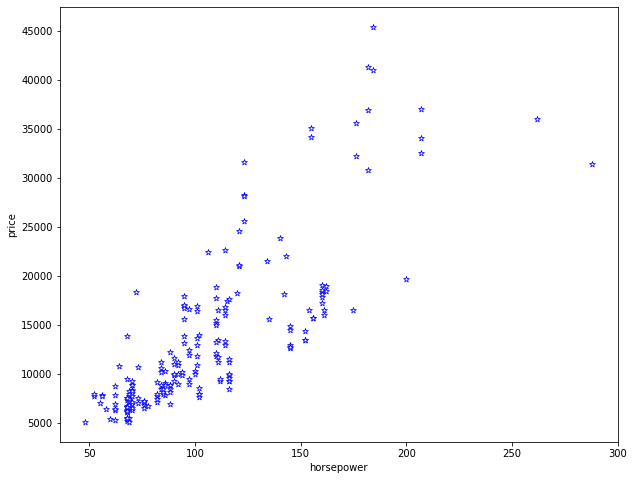

In [120]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='horsepower',y='price',data=adata, edgecolor = 'blue',marker='*', color = 'white')

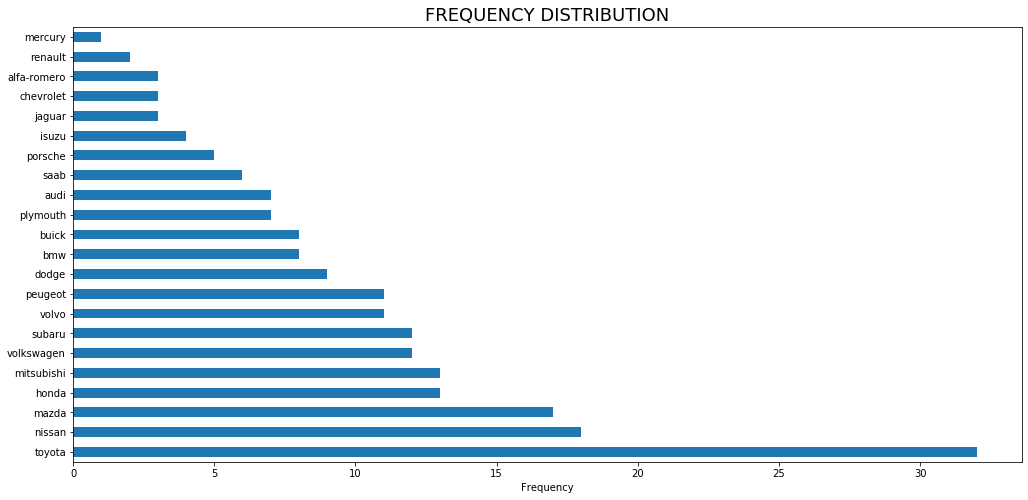

In [121]:
plt.figure(figsize=(17,8))
adata.brand.value_counts().plot(kind='barh')
plt.xlabel('Frequency')
plt.title('FREQUENCY DISTRIBUTION',fontsize=18)
plt.show()

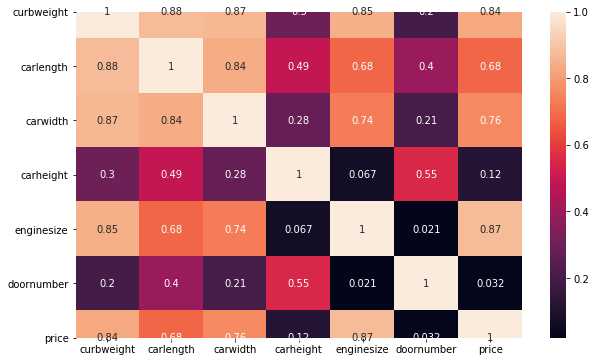

In [123]:
#correlation
plt.figure(figsize = (10, 6))
sns.heatmap(adata[['curbweight','carlength','carwidth','carheight','enginesize','doornumber','price']].corr(), annot = True)
plt.show()

#### curbweight has multicollinearity with carlength, carwidth, engine size,

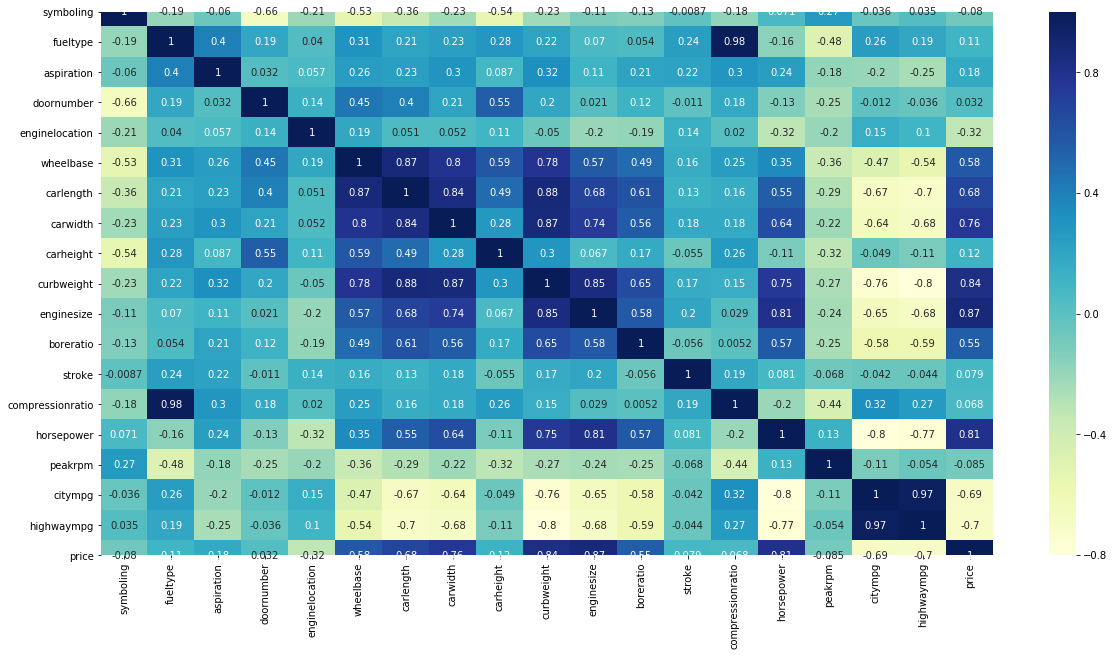

In [71]:
#Complete Heat map
plt.figure(figsize = (20, 10))
sns.heatmap(adata.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Now we can get clear idea of curb weight is having multi collinearity with most of other variables

<Figure size 1800x432 with 0 Axes>

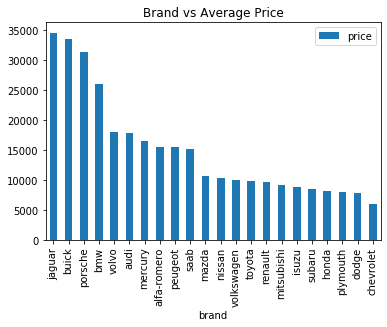

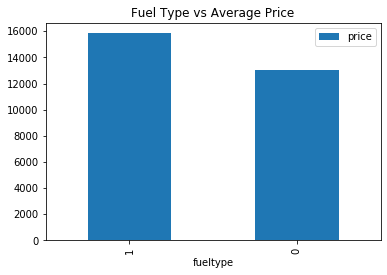

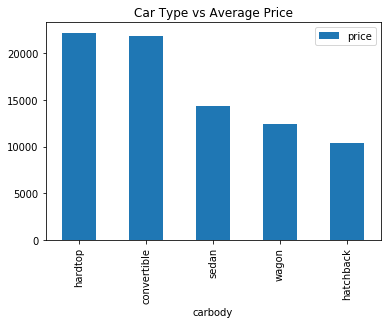

In [94]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(adata.groupby(['brand'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand vs Average Price')
plt.show()

df = pd.DataFrame(adata.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(adata.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

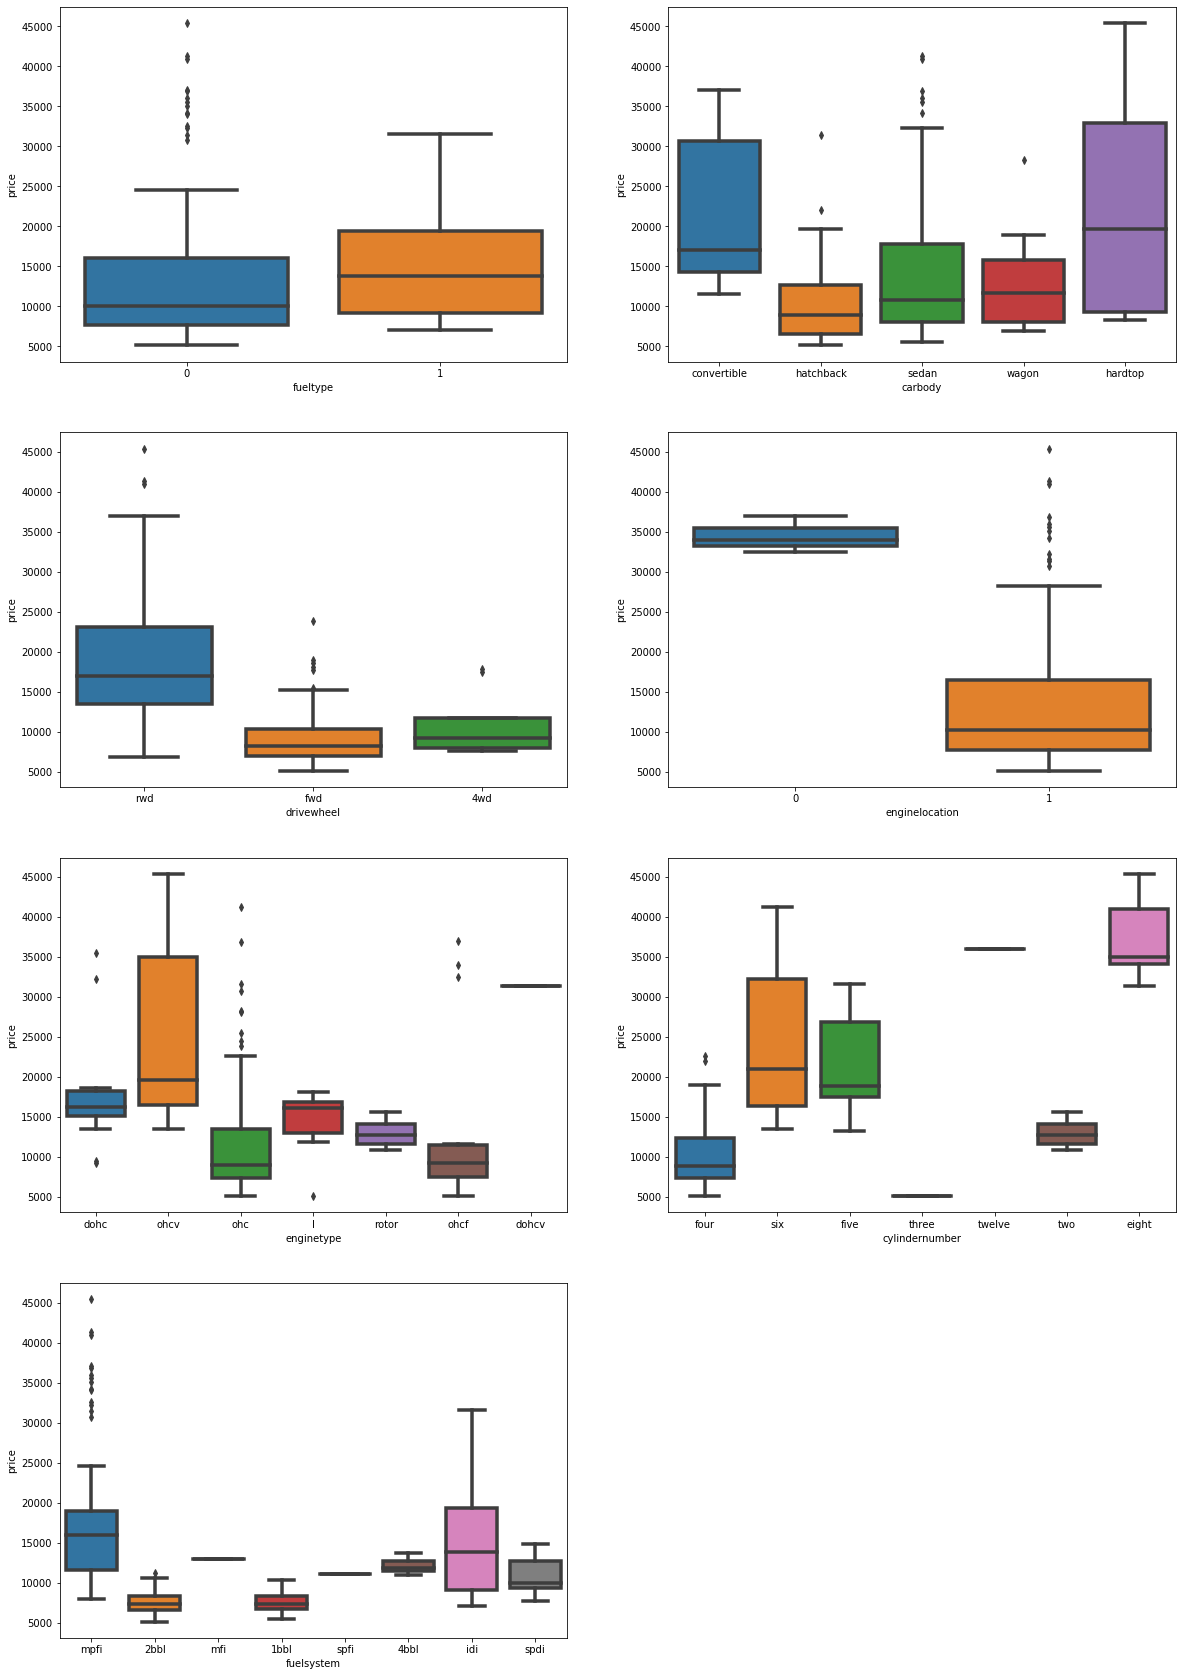

In [45]:
#Plotting sub plots with box plots to get inferences 
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,2)
sns.boxplot(x = 'carbody', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,3)
sns.boxplot(x = 'drivewheel', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,4)
sns.boxplot(x = 'enginelocation', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = adata, linewidth=3.5)
plt.subplot(4,2,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = adata, linewidth=3.5)


plt.show()

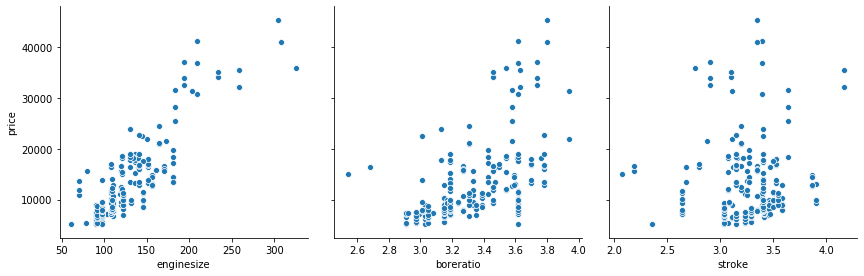

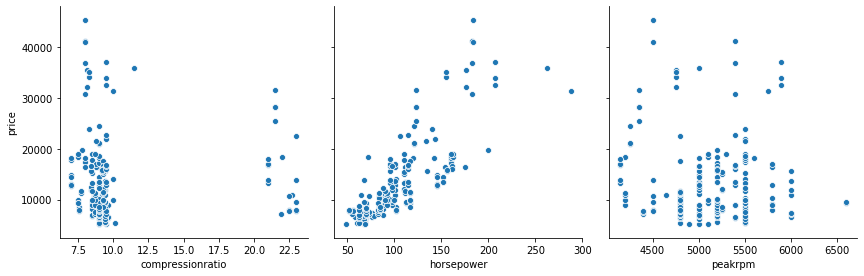

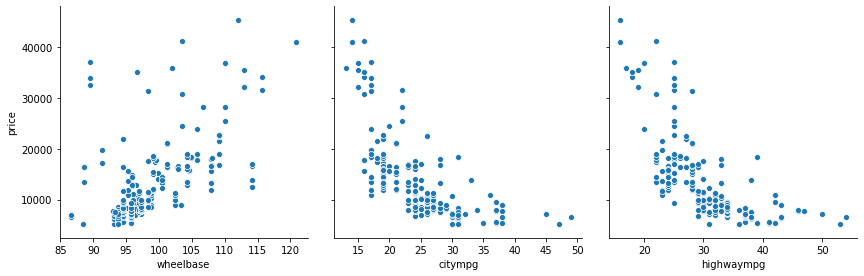

In [96]:
def visual(x,y,z):
    sns.pairplot(adata, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

visual('enginesize', 'boreratio', 'stroke')
visual('compressionratio', 'horsepower', 'peakrpm')
visual('wheelbase', 'citympg', 'highwaympg')


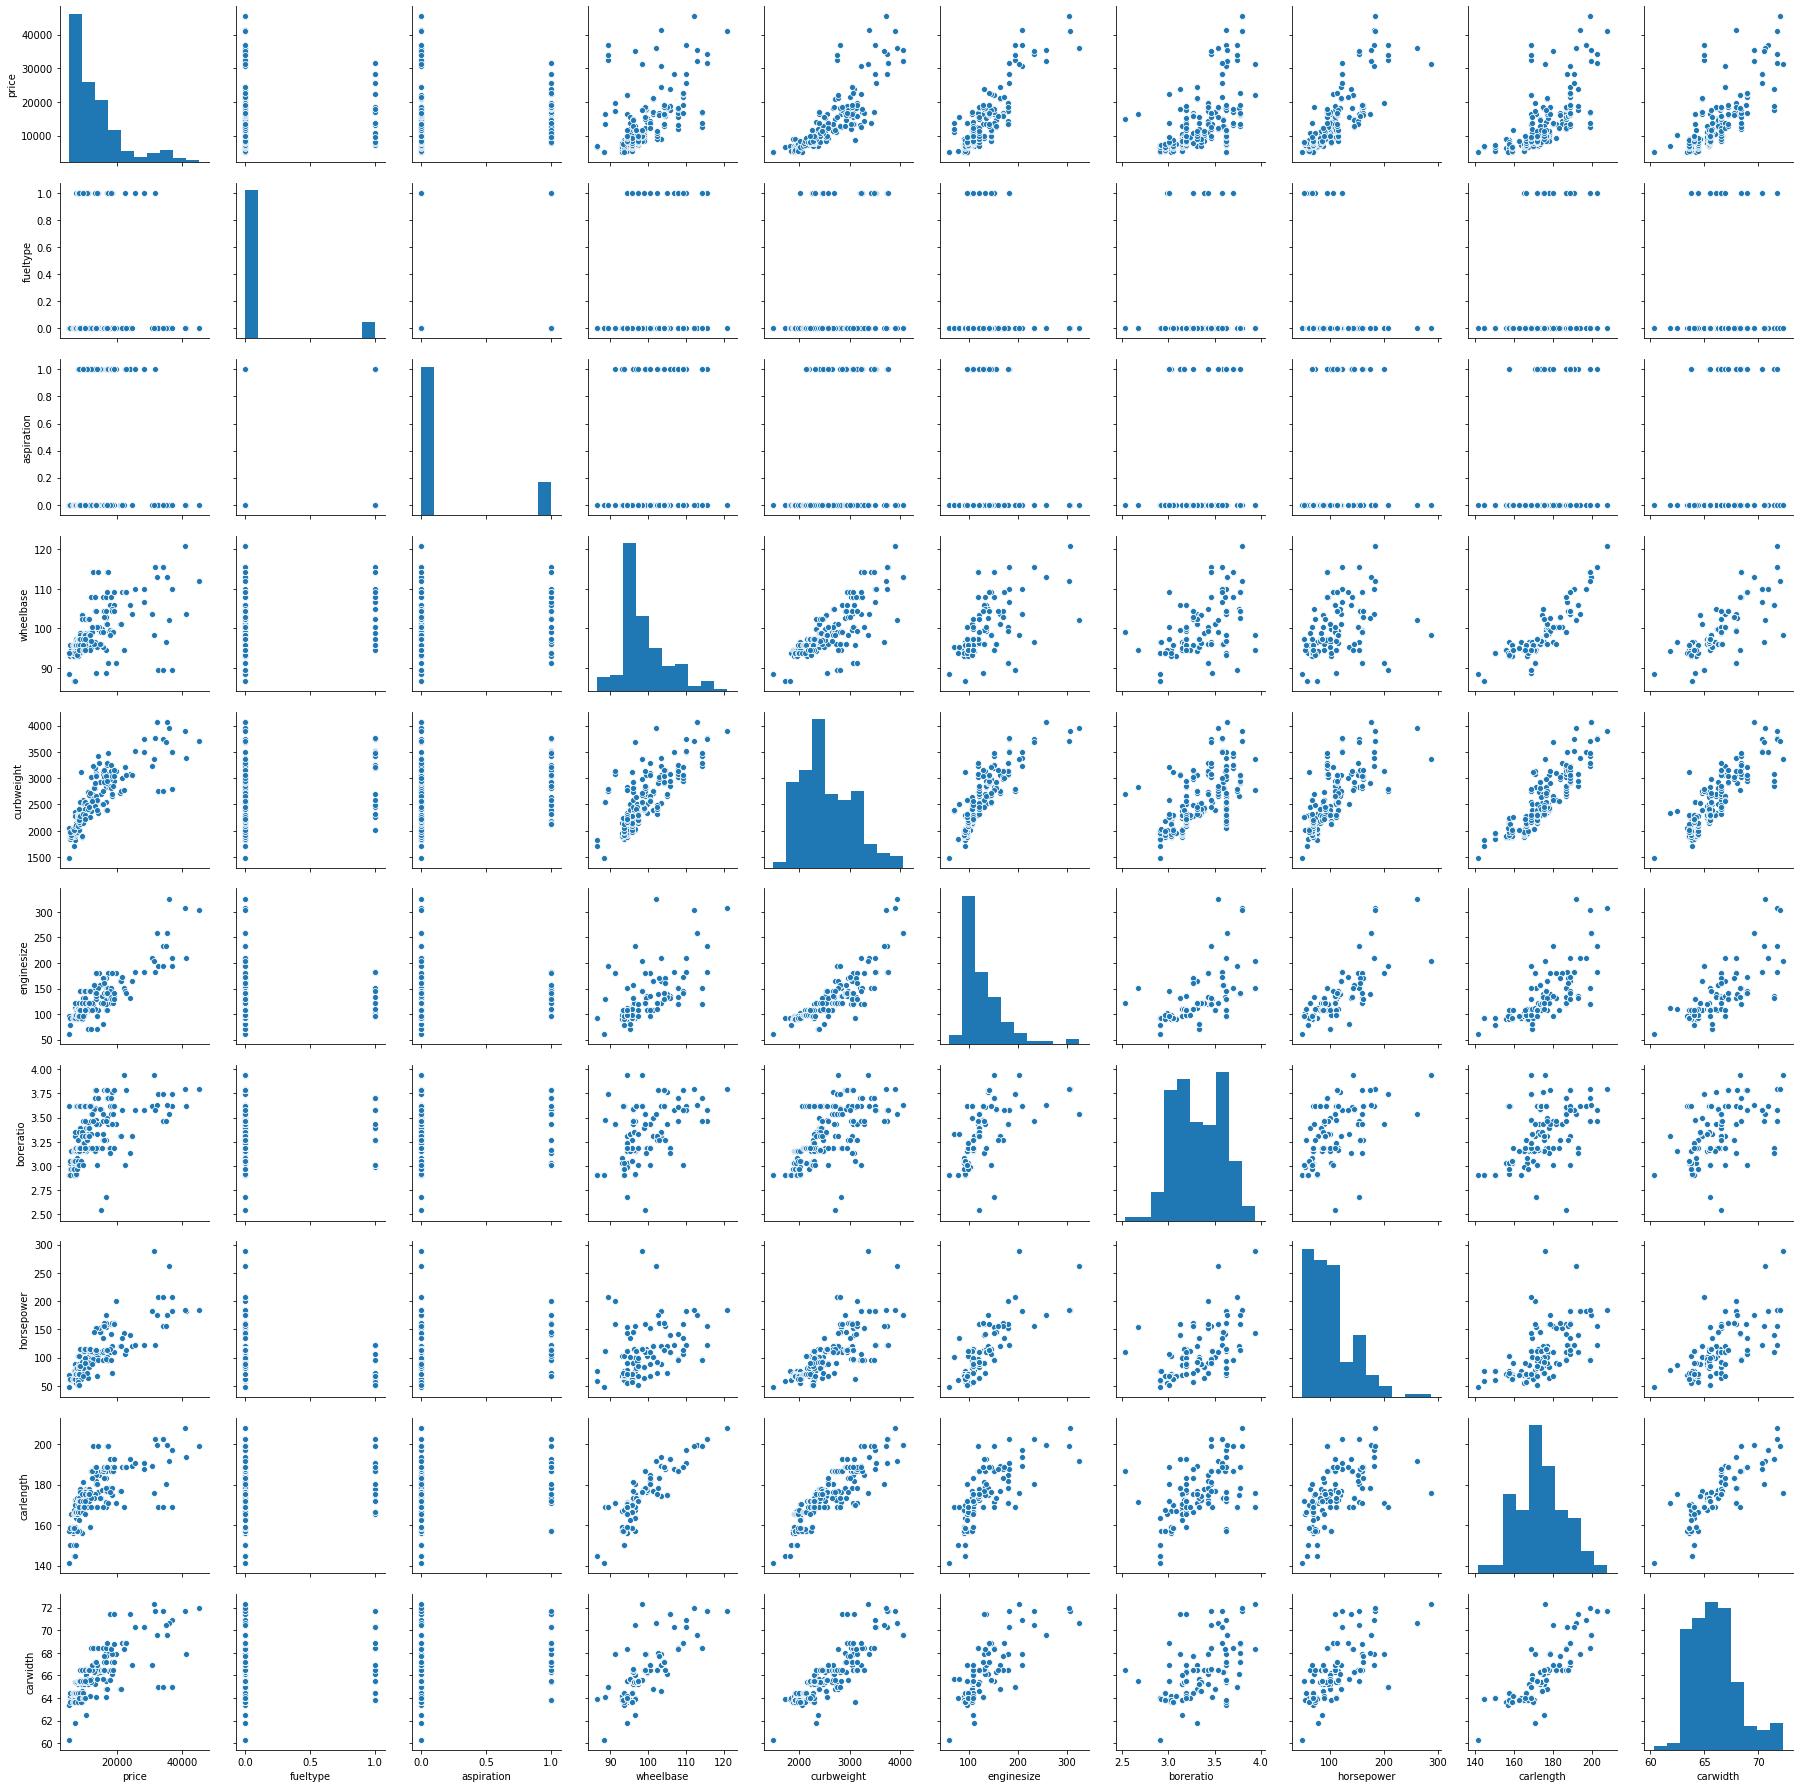

In [384]:
cars = adata[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
sns.pairplot(cars)

## SIMPLE LINEAR REGRESSION MODEL

##### Now we are going to check correlation between price column and all other , so that we can choose best attribute which best fits for SIMPLE LINEAR REGRESSION.

We have got Engine size is mostly influencing  i.e. having high correlatin compared to others , so we will select this as our main feature.

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth 

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [124]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(adata,train_size=0.7,random_state=100)

In [126]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[_vars] = scaler.fit_transform(df_train[_vars])

In [134]:
elem=[ 'curbweight', 'enginesize', 'horsepower','carwidth']
res=[]
for i in elem:
    print(i.upper())
    x=adata[i]
    y=adata['price']
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)
    x_train = x_train[:,np.newaxis]
    x_test = x_test[:,np.newaxis]
    y_train=y_train[:,np.newaxis]
    y_test=y_test[:,np.newaxis]
    print('EQUATION')
    modelll=LinearRegression()
    modelll.fit(x_train,y_train)
    print(str(modelll.intercept_),'+',str(modelll.coef_),'*',i)
    y_train_pred=modelll.predict(x_train)
    y_test_pred = modelll.predict(x_test)
    
    print('{} got r2 score for:\ntrain data as :{} and \nfor test data as:{}'.format(i,round(r2_score(y_train,y_train_pred),3),round(r2_score(y_test, y_test_pred),3)))
    print('_'*50)
    res.append(r2_score(y_train,y_train_pred))

CURBWEIGHT
EQUATION
[-18316.5700889] + [[12.35392314]] * curbweight
curbweight got r2 score for:
train data as :0.743 and 
for test data as:0.604
__________________________________________________
ENGINESIZE
EQUATION
[-7607.86224311] + [[165.36918506]] * enginesize
enginesize got r2 score for:
train data as :0.753 and 
for test data as:0.784
__________________________________________________
HORSEPOWER
EQUATION
[-3192.65056523] + [[158.44573459]] * horsepower
horsepower got r2 score for:
train data as :0.65 and 
for test data as:0.656
__________________________________________________
CARWIDTH
EQUATION
[-172515.03928626] + [[2818.52643997]] * carwidth
carwidth got r2 score for:
train data as :0.639 and 
for test data as:0.45
__________________________________________________


### Creating duummy varibables

In [135]:
lst=['carbody','drivewheel','enginetype','cylindernumber','fuelsystem']
for i in lst:
    dummy=pd.get_dummies(adata[i],drop_first=True)
    adata=pd.concat([adata,dummy],axis=1)
    adata.drop([i],axis=1,inplace=True)


In [136]:
dummy = pd.get_dummies(adata['brand'], drop_first = True)
adata = pd.concat([adata, dummy], axis = 1)
adata.drop(['brand'], axis = 1, inplace = True)


In [137]:
adata.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'model', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi',
       'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo'],
      dtype='object')

In [138]:
cols=list(adata.columns)
len(cols)

66

In [139]:
adata = adata.drop(columns=['model'])


### MULTIPLE LINEAR REGRESSION
#### train test split and feature scaling

In [298]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(adata, train_size = 0.7, test_size = 0.3, random_state = 100)


In [299]:

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [300]:
y_train = df_train.pop('price')
X_train = df_train

## RFE

In [301]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [302]:
lm = LinearRegression()
lm.fit(x_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(x_train, y_train)
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 51),
 ('fueltype', False, 39),
 ('aspiration', False, 21),
 ('doornumber', False, 48),
 ('enginelocation', True, 1),
 ('wheelbase', False, 14),
 ('carlength', False, 8),
 ('carwidth', True, 1),
 ('carheight', False, 42),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 5),
 ('compressionratio', False, 44),
 ('horsepower', False, 11),
 ('peakrpm', False, 52),
 ('citympg', False, 49),
 ('highwaympg', False, 50),
 ('hardtop', False, 17),
 ('hatchback', False, 15),
 ('sedan', False, 18),
 ('wagon', False, 16),
 ('fwd', False, 47),
 ('rwd', False, 24),
 ('dohcv', False, 36),
 ('l', False, 7),
 ('ohc', False, 43),
 ('ohcf', False, 12),
 ('ohcv', False, 22),
 ('rotor', True, 1),
 ('five', False, 3),
 ('four', False, 4),
 ('six', False, 31),
 ('three', True, 1),
 ('twelve', False, 2),
 ('two', True, 1),
 ('2bbl', False, 40),
 ('4bbl', False, 26),
 ('idi', False, 38),
 ('mfi', False, 53),
 ('mpfi', False, 29),
 ('spdi', False,

In [303]:
rfe_ = x_train.columns[rfe.support_]
rfe_

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'rotor', 'three', 'two', 'bmw', 'porsche'],
      dtype='object')

These are the columns obtained with RFE.

In [304]:
# Creating  dataframe with RFE selected variables

x_train_rfe = x_train[rfe_]


In [305]:
def build_model(X,y):
    X = sm.add_constant(X) 
    #Ading constant
    lm = sm.OLS(y,X).fit() 
    print(lm.summary()) #summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [306]:
x_train_new = build_model(x_train_rfe,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.18e-65
Time:                        22:50:05   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1760      0.084      2.

p-vale of  #three seems to be higher than the significance value of 0.05, hence dropping it as it is insignificant in presence of other variables.

In [307]:
x_train_new = x_train_rfe.drop(["three"], axis = 1)


In [308]:
x_train_new = build_model(x_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     163.9
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           2.55e-65
Time:                        22:50:06   Log-Likelihood:                 187.00
No. Observations:                 143   AIC:                            -356.0
Df Residuals:                     134   BIC:                            -329.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1755      0.085      2.

In [309]:
checkVIF(x_train_new)


,Features,VIF
6,rotor,inf
7,two,inf
0,const,228.54
3,curbweight,8.62
4,enginesize,5.13
2,carwidth,4.80
5,boreratio,1.85
9,porsche,1.80
1,enginelocation,1.65
8,bmw,1.09


In [310]:
x_train_new = x_train_new.drop(columns=['rotor','two'])


In [311]:
checkVIF(x_train_new)


,Features,VIF
0,const,227.47
3,curbweight,8.35
2,carwidth,4.78
4,enginesize,4.42
5,boreratio,1.84
7,porsche,1.80
1,enginelocation,1.64
6,bmw,1.09


In [312]:
x_train_new = build_model(x_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     166.7
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           3.39e-63
Time:                        22:50:07   Log-Likelihood:                 178.98
No. Observations:                 143   AIC:                            -342.0
Df Residuals:                     135   BIC:                            -318.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1987      0.090      2.

In [313]:
x_train_new = x_train_new.drop(["boreratio"], axis = 1)


In [314]:
x_train_new = build_model(x_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           7.79e-63
Time:                        22:50:08   Log-Likelihood:                 175.27
No. Observations:                 143   AIC:                            -336.5
Df Residuals:                     136   BIC:                            -315.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1782      0.092      1.

In [315]:
x_train_new = x_train_new.drop(["porsche"], axis = 1)


In [316]:
x_train_new = build_model(x_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     214.0
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           6.87e-63
Time:                        22:50:09   Log-Likelihood:                 172.52
No. Observations:                 143   AIC:                            -333.0
Df Residuals:                     137   BIC:                            -315.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2960      0.077      3.

In [317]:
checkVIF(x_train_new)


,Features,VIF
0,const,155.73
3,curbweight,7.26
2,carwidth,4.40
4,enginesize,4.35
5,bmw,1.09
1,enginelocation,1.08


In [318]:
x_train_new = x_train_new.drop('const',axis=1)


In [319]:
checkVIF(x_train_new)


,Features,VIF
2,curbweight,34.36
1,carwidth,32.11
3,enginesize,14.33
0,enginelocation,7.59
4,bmw,1.13


In [320]:
x_train_new = x_train_new.drop('curbweight',axis=1)


In [321]:
x_train_new = build_model(x_train_new,y_train)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.18e-61
Time:                        22:50:11   Log-Likelihood:                 166.60
No. Observations:                 143   AIC:                            -323.2
Df Residuals:                     138   BIC:                            -308.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2782      0.080      3.

In [322]:
checkVIF(x_train_new)


,Features,VIF
0,const,155.02
3,enginesize,2.68
2,carwidth,2.50
4,bmw,1.09
1,enginelocation,1.08


In [323]:
lm = sm.OLS(y_train,x_train_new).fit()
y_train_price = lm.predict(x_train_new)

In [252]:
checkVIF(x_train_new)


,Features,VIF
0,const,155.02
3,enginesize,2.68
2,carwidth,2.50
4,bmw,1.09
1,enginelocation,1.08


Text(0.5, 0, 'Errors')

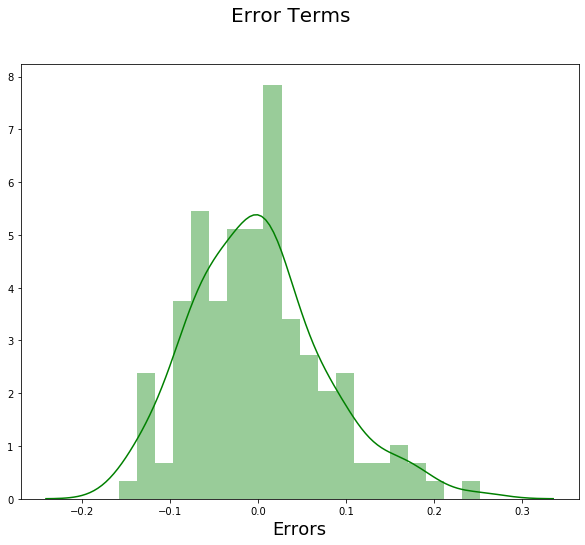

In [346]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(10,8))
sns.distplot((y_train - y_train_price), bins = 20, color = 'green')
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)


### For test data

In [327]:
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

y_test = df_test['price']
x_test = df_test

x_train_new = x_train_new.drop('const',axis=1)

# Predicting

x_test_new = x_test[x_train_new.columns]

x_test_new = sm.add_constant(x_test_new)

y_pred = lm.predict(x_test_new)

Text(0, 0.5, 'y_pred')

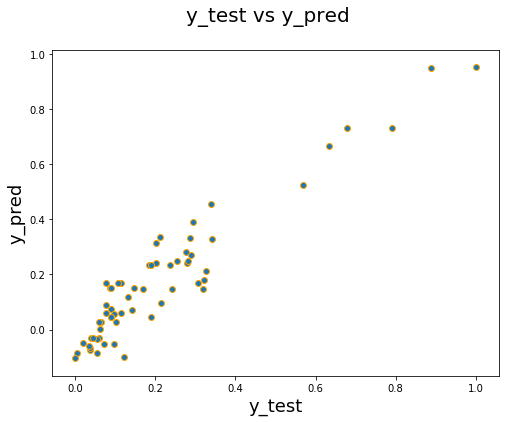

In [336]:
# Plotting y_test and y_pred to know the spread.
fig = plt.figure(figsize = (8,6))
plt.scatter(y_test,y_pred, edgecolor = 'orange')
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=18)

In [339]:
print(round(r2_score(y_train, y_train_price),2))
print(round(r2_score(y_test, y_pred),2))

0.88
0.84


#### TRAIN SET GOT AN ACCURACY OF 88%.
#### TEST SET GOT AN ACCURACY OF 84%.

In [349]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     245.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.18e-61
Time:                        23:02:49   Log-Likelihood:                 166.60
No. Observations:                 143   AIC:                            -323.2
Df Residuals:                     138   BIC:                            -308.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2782      0.080      3.478      0.001       0.120       0.436
enginelocation    -0.4650      0.080     -5.810      0.000      -0.623      -0.307
carwidth           0.5195      0.055      9.400      0.000       0.410       0.629
enginesize         0.6316      0.068      9.251      0.000       0.497       0.767
bmw                0.2526      0.033      7.563      0.000       0.187       0.319
==============================================================================
Omnibus:                        9.053   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.915
Skew:                           0.576   Prob(JB):                       0.0116
Kurtosis:                       3.410   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### From the evaluation of statistics:
1. R-sqaured and Adjusted R-squared (extent of fit) - 0.877 & 0.873
2. p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.

###### It has been observed that below ones are representing most of the features of the car. As there is change in them it is observed that there is noticable change in the price linearly.
###### It was noted that engine location, carwidth , engine size and companies like bmw area affecting the price of the car.